<a href="https://colab.research.google.com/github/TeigenMillies/MAT422/blob/main/2_2_Probability_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.2 Probability Distribution
---------------------------------------------------------
- Probability axioms
- Conditional probability
- Discrete random variables
- Continues random variables

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.stats import norm

# 2.2.1. Probability axioms
Given an experiment and a sample space S, the probability
distribution is a function which assign to each event A a number P(A), called
the probability of the event A, which will give a precise measure of the chance
that A will occur. The probability assignments should satisfy the following
axioms (basic properties) of probability
- For any event A, 1 ≥ P(A) ≥ 0
- P(S) = 1
- If A1, A2, A3, . . . is an infinite collection of disjoint events, then

P (A1 ∪ A2 ∪ A3 ∪ · · · ) = ∞ ∑ i=1 P (Ai)

- For any event A, P(A) + P (A′) = 1, from which P(A) = 1 − P (A′)
- When events A and B are mutually exclusive, P(A ∪ B) = P(A) + P(B)
- For any two events A and B,

P(A ∪ B) = P(A) + P(B) − P(A ∩ B)

In [18]:
# Sample space for rolling two six-sided dice
sample_space = [(d1, d2) for d1 in range(1, 7) for d2 in range(1, 7)]

# Defining events:
# The sum of the two dice equals 7
sum7 = [outcome for outcome in sample_space if sum(outcome) == 7]

# Both dice show the same number (doubles)
doubles = [outcome for outcome in sample_space if outcome[0] == outcome[1]]

# The sum of the two dice is greater than or equal to 10
sum10 = [outcome for outcome in sample_space if sum(outcome) >= 10]

# The sum of two dice is less than 10
not_sum10 = [outcome for outcome in sample_space if sum(outcome) < 10]

# Function to calculate the probability of an event
def probability(event, sample_space):
    return len(event) / len(sample_space)

# Calculate the union of Event A and Event B (outcomes in A, B, or both)
union = list(set(sum7).union(set(doubles)))

# Calculating and displaying the probabilities for each event
print("Sample Space:", sample_space)
print(f"Total outcomes: {total_outcomes}")

# Probability of sum equals 7
print(f"Event A (sum equals 7): {sum7}")
prob_A = probability(sum7, sample_space)
print(f"P(A) = {prob_A}")

# Probability of doubles
print(f"Event B (doubles): {doubles}")
prob_B = probability(doubles, sample_space)
print(f"P(B) = {prob_B}")

# Probability of sum >= 10
print(f"Event C (sum >= 10): {sum10}")
prob_C = probability(sum10, sample_space)
print(f"P(C) = {prob_C}")

# Probabilty of sum < 10
print(f"Event C' (sum < 10): {not_sum10}")
prob_D = probability(not_sum10, sample_space)
print(f"P(D) = {prob_D}")

# Events are mutually exclusive so P(A U B) will equal P(A) + P(B)
prob_union = probability(union, sample_space)
print(f"If two events are mutually exclusive the probability of the union should equal the probability of their event probability additions")
print(f"P(A U B) = {prob_union}")
print(f"P(A) + P(B): {prob_A + prob_B}")

Sample Space: [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)]
Total outcomes: 4
Event A (sum equals 7): [(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)]
P(A) = 0.16666666666666666
Event B (doubles): [(1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6)]
P(B) = 0.16666666666666666
Event C (sum >= 10): [(4, 6), (5, 5), (5, 6), (6, 4), (6, 5), (6, 6)]
P(C) = 0.16666666666666666
Event C' (sum < 10): [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (5, 1), (5, 2), (5, 3), (5, 4), (6, 1), (6, 2), (6, 3)]
P(D) = 0.8333333333333334
If two events are mutually exclusive the probability of the union should equal the probability of t

# 2.2.2. Conditional probability
Conditional probability is defined as the likelihood of an event or outcome
occurring, based on the occurrence of a previous event or outcome. The conditional probability is expressed as a ratio of unconditional probabilities

P(A | B) = P(A ∩ B) / P(B)

In [19]:



# Event at least one die is a 4
event_D = [outcome for outcome in sample_space if 4 in outcome]

# Event A ∩ B: The sum of the two dice equals 7, and at least one die is a 4
event_A_and_D = [outcome for outcome in event_D if sum(outcome) == 7]


# Calculate the probabilities
P_A = probability(sum7, sample_space)
P_D = probability(event_D, sample_space)
P_A_and_D = probability(event_A_and_D, sample_space)

# Conditional Probability P(A | B)
if P_D > 0:  # We can only calculate P(A | B) if P(B) > 0
    P_A_given_D = P_A_and_D / P_D
else:
    P_A_given_D = 0

# Output the results
print(f"Event A (sum equals 7): {sum7}")
print(f"Event D (at least one die shows a 4): {event_D}")
print(f"Event A ∩ B (sum equals 7 and at least one die is a 4): {event_A_and_D}")

print(f"P(A) = {P_A}")
print(f"P(B) = {P_B}")
print(f"P(A ∩ B) = {P_A_and_D}")
print(f"P(A | B) = {P_A_given_D}")
print(f"The Multiplication rule says P(A ∩ B) = P(A | B) · P(B) which holds true here as well:")
print(f"P(A | B) · P(B) = {P_A_given_D * P_D}")


Event A (sum equals 7): [(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)]
Event D (at least one die shows a 4): [(1, 4), (2, 4), (3, 4), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (5, 4), (6, 4)]
Event A ∩ B (sum equals 7 and at least one die is a 4): [(3, 4), (4, 3)]
P(A) = 0.16666666666666666
P(B) = 0.3055555555555556
P(A ∩ B) = 0.05555555555555555
P(A | B) = 0.1818181818181818
The Multiplication rule says P(A ∩ B) = P(A | B) · P(B) which holds true here as well:
P(A | B) · P(B) = 0.05555555555555555


# 2.2.3. Discrete random variables
A random variable is understood as a measurable function defined on a probability space that maps from the sample space to the real numbers. It is
often convenient to associate each outcome of an experiment with a number.
A random variable is described informally as a variable whose values depend
on outcomes of a random phenomenon

A discrete random variable is a random variable whose possible values either constitute a finite set or else can be listed in an infinite
sequence.

The Poisson distribution is a discrete probability distribution that describes the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event. A discrete random variable X is said to have a Poisson distribution with parameter λ if the pmf of X is
The pmf of X has the form

p(x; λ) = (e^−λ * λ^x) / x! , x = 0, 1, 2, 3, . . .

For this example we will assume a coffee shop with a rate of 5 customers per hour and model it with a Poisson distribution

Average number of customers (λ): 5
Simulated Expected Value: 5.0125
Simulated Variance: 4.895743750000001


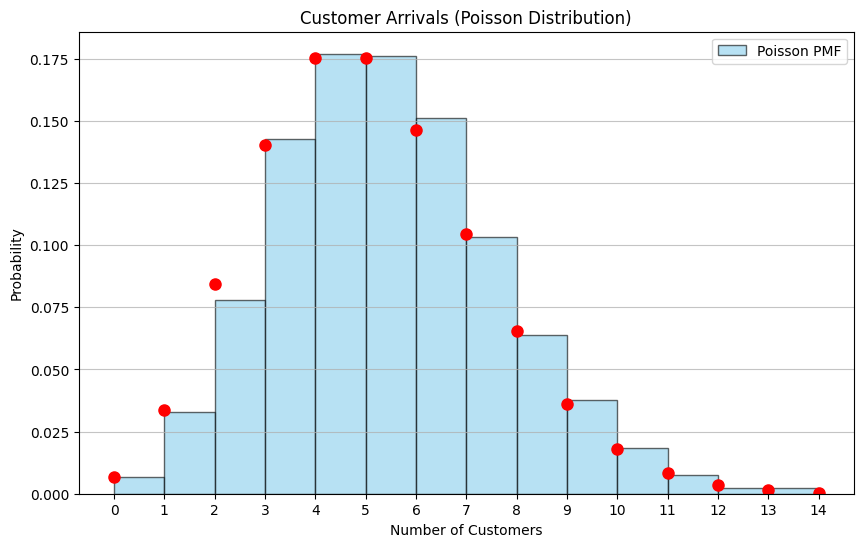

In [30]:
# Set lambda and number of tests
lamb = 5
tests = 10000

# Set average customer arrivals with poisson distribution
customers = np.random.poisson(lamb, tests)

# Find expected value and variance
expected_value = np.mean(customers)
variance = np.var(customers)

# Display results
print(f"Average number of customers (λ): {lamb}")
print(f"Simulated Expected Value: {expected_value}")
print(f"Simulated Variance: {variance}")

# Plot distribution of customer arrivals
plt.figure(figsize=(10, 6))
plt.hist(customers, bins=range(15), density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Poisson PMF')
plt.title('Customer Arrivals (Poisson Distribution)')
plt.xlabel('Number of Customers')
plt.ylabel('Probability')
plt.xticks(range(15))
plt.grid(axis='y', alpha=0.75)

# Overlay of Poisson probability mass function
x = np.arange(0, 15)
plt.plot(x, poisson.pmf(x, lamb), 'ro', markersize=8)
plt.legend()
plt.show()

# 2.2.4 Continues Random Variables
A random variable X is continuous if possible values comprise either a single
interval on the number line or a union of disjoint intervals.Then a probability
distribution or probability density function (pdf) of X is a function f (x) such
that for any two numbers a and b with a ≤ b
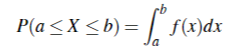

Normal distributions are often used in the natural and social sciences to
represent real-valued random variables whose distributions are not known.A continuous random variable X is said to have a normal
distribution with parameters
μ and
σ (or
μ and
σ 2 ), where −∞ <
μ < ∞
and 0 <
σ , if the pdf of X is

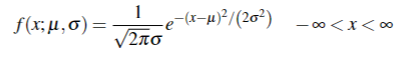

Simulated Mean Height: 169.932847201842
Simulated Standard Deviation: 9.836706522895971


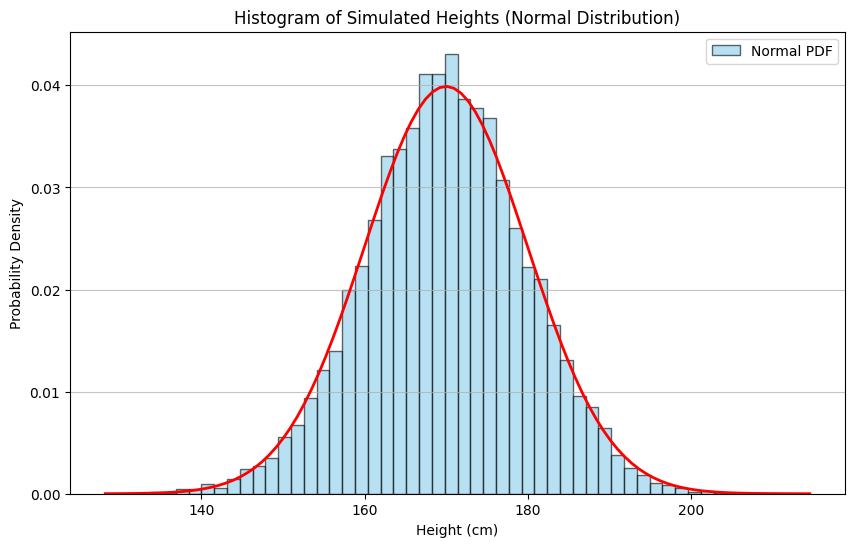

In [31]:
# Continuous random variable example with heights
# Set normal distribution values for mean, standard deviation, and number of samples
mean = 170
std_dev = 10
samples = 10000

# Load random heights following a normal distribution
heights = np.random.normal(mean, std_dev, samples)

# Calculate the mean and standard deviation of the generated data
calculated_mean = np.mean(heights)
calculated_std_dev = np.std(heights)

print(f"Simulated Mean Height: {calculated_mean}")
print(f"Simulated Standard Deviation: {calculated_std_dev}")

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(heights, bins=50, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Normal PDF')

# Compare with normal distribution curve
xmin, xmax = plt.xlim()  # Set the limits for x-axis
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std_dev)  # Theoretical Probability Density Function (PDF)
plt.plot(x, p, 'r', linewidth=2)

plt.title('Histogram of Simulated Heights (Normal Distribution)')
plt.xlabel('Height (cm)')
plt.ylabel('Probability Density')
plt.legend()

plt.grid(axis='y', alpha=0.75)
plt.show()
